In [ ]:
#devtools::install_github("gibbsdavidl/robencla", force = F)

In [2]:
library(tidyverse)
library(robencla)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: R6

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: xgboost


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice


Loading required package: plotROC

Loading required package: parallel

Loading required package: ROCit



In [21]:
### PULLING OUT SOME GENES
#setwd("E:/Work/GBM_clusters/feature_selection")
resdf <- read.csv('data/feature_pairs_males_v3.csv')
dfa <- read.csv('data/Males_CV_Data_v3.csv')

In [22]:
dim(dfa)

[1]   220 10344

In [58]:
clusters <- c('cluster1','cluster2','cluster3','cluster4','cluster5')

idxlist <- c()

for (ci in clusters) {    
    # first sorted by distance between
    x1 <- resdf %>% dplyr::filter(cluster==ci) %>% arrange( desc(abs(dist_ij_cluster))) %>% head(n=3) %>% select('gene_i') %>% as_vector()
    x2 <- resdf %>% dplyr::filter(cluster==ci) %>% arrange( desc(abs(dist_ij_cluster))) %>% head(n=3) %>% select('gene_j') %>% as_vector()
    # then sorted by max proportion difference
    x3 <- resdf %>% dplyr::filter(cluster=='cluster1') %>% arrange( desc(abs(prop_diff))) %>% head(n=3) %>% select('gene_i') %>% as_vector()
    x4 <- resdf %>% dplyr::filter(cluster=='cluster1') %>% arrange( desc(abs(prop_diff))) %>% head(n=3) %>% select('gene_j') %>% as_vector()
    for (i in 1:3) {
        if (x1[i] == x3[i] && x2[i] == x4[i]) {
            print("WARNING DUPS")
            print(c(x1[i],x2[i],x3[i],x4[i]))
            idxlist <- c(idxlist, c(x1[i],x2[i],x3[i],x4[i]))
        } else {
            idxlist <- c(idxlist, c(x1[i],x2[i],x3[i],x4[i]))
        }
    }
}
    
genelist <- colnames(dfa)[idxlist]

In [59]:
genelist

[1] "NTRK2"    "POSTN"    "TMEM43"   "JAG1"     "POSTN"    "MAN1C1"  
 [7] "CIT"      "POLR1B"   "HSPB8"    "POSTN"    "MID1IP1"  "ZCCHC10" 
[13] "BBOX1"    "RCAN1"    "TMEM43"   "JAG1"     "IBSP"     "PPARGC1A"
[19] "CIT"      "POLR1B"   "TPM4"     "C1D"      "MID1IP1"  "ZCCHC10" 
[25] "TPM4"     "IFI44L"   "TMEM43"   "JAG1"     "METTL3"   "IFI44L"  
[31] "CIT"      "POLR1B"   "RSAD2"    "GSK3A"    "MID1IP1"  "ZCCHC10" 
[37] "DNAJC7"   "PRKRIP1"  "TMEM43"   "JAG1"     "MAP3K7"   "ZNF512B" 
[43] "CIT"      "POLR1B"   "DNAJC7"   "LARS2"    "MID1IP1"  "ZCCHC10" 
[49] "NDC80"    "CRYM"     "TMEM43"   "JAG1"     "CRYM"     "KIF20A"  
[55] "CIT"      "POLR1B"   "CCK"      "TTK"      "MID1IP1"  "ZCCHC10"

In [60]:
save(genelist, file='data/Males_feature_sel_genelist.rda')

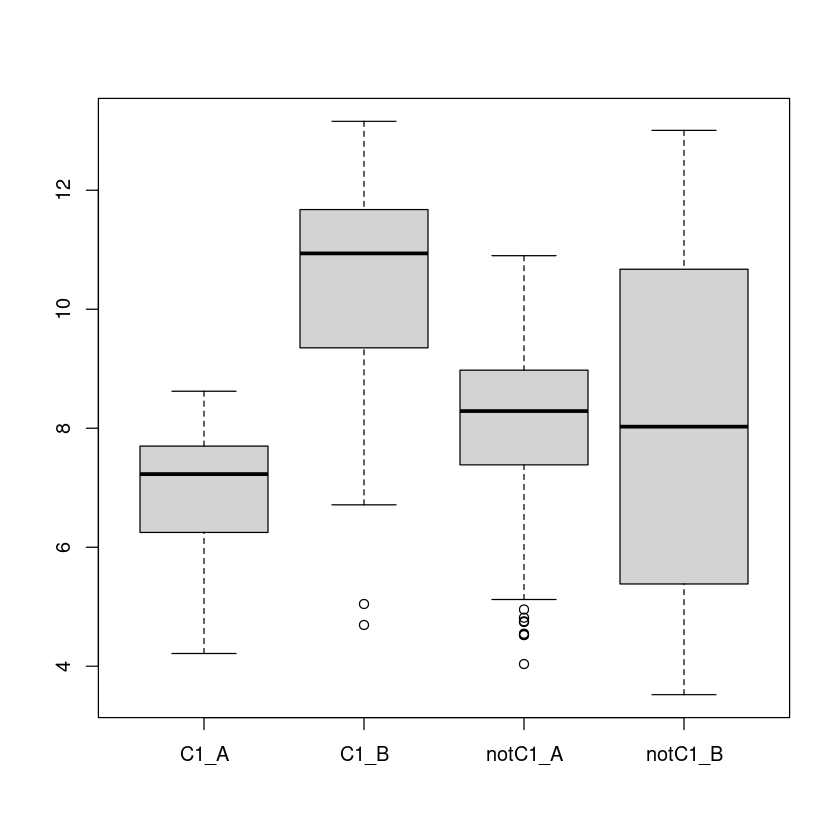

In [52]:
geneA <- genelist[1]
geneB <- genelist[2]

v1 <- dfa[dfa$cluster.group == 'cluster1', geneA]
v2 <- dfa[dfa$cluster.group == 'cluster1', geneB]
v3 <- dfa[dfa$cluster.group != 'cluster1', geneA]
v4 <- dfa[dfa$cluster.group != 'cluster1', geneB]

boxplot(list(C1_A=v1,C1_B=v2, notC1_A=v3, notC1_B=v4))


In [29]:
### PULLING OUT SOME GENES
#setwd("E:/Work/GBM_clusters/feature_selection")
resdf_f <- read.csv('data/feature_pairs_female_v3.csv')
dfa_f <- read.csv('data/Females_CV_Data_v3.csv')

In [30]:
head(resdf_f)

,item,cluster,pair,gene_i,gene_j,prop_this_cluster,prop_not_cluster,dist_ij_cluster,dist_ij_not_cluster,prop_diff
,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,cluster1,1,68,8281,0.14634146,0.8888889,-59.40443,79.01860,-0.7425474
2,2,cluster1,2,193,4862,0.82926829,0.1616162,31.50396,-139.84332,0.6676521
3,3,cluster1,3,293,4401,0.82926829,0.1010101,6.44260,-92.44827,0.7282582
4,4,cluster1,4,338,2906,0.92682927,0.2424242,79.81535,-162.10268,0.6844050
5,5,cluster1,5,497,3581,0.95121951,0.2828283,62.31829,-65.07694,0.6683912
6,6,cluster1,6,800,8976,0.07317073,0.7373737,-39.76830,87.40717,-0.6642030


In [61]:
clusters <- c('cluster1','cluster2','cluster3','cluster4','cluster5')

idxlist <- c()

for (ci in clusters) {    
    # first sorted by distance between
    x1 <- resdf_f %>% dplyr::filter(cluster==ci) %>% arrange( desc(abs(dist_ij_cluster))) %>% head(n=3) %>% select('gene_i') %>% as_vector()
    x2 <- resdf_f %>% dplyr::filter(cluster==ci) %>% arrange( desc(abs(dist_ij_cluster))) %>% head(n=3) %>% select('gene_j') %>% as_vector()
    # then sorted by max proportion difference
    x3 <- resdf_f %>% dplyr::filter(cluster=='cluster1') %>% arrange( desc(abs(prop_diff))) %>% head(n=3) %>% select('gene_i') %>% as_vector()
    x4 <- resdf_f %>% dplyr::filter(cluster=='cluster1') %>% arrange( desc(abs(prop_diff))) %>% head(n=3) %>% select('gene_j') %>% as_vector()
    for (i in 1:3) {
        if (x1[i] == x3[i] && x2[i] == x4[i]) {
            print("WARNING DUPS")
            print(c(x1[i],x2[i],x3[i],x4[i]))
            idxlist <- c(idxlist, c(x1[i],x2[i],x3[i],x4[i]))
        } else {
            idxlist <- c(idxlist, c(x1[i],x2[i],x3[i],x4[i]))
        }
    }
}
    
genelist <- colnames(dfa)[idxlist]

In [62]:
genelist

[1] "SOX11"    "PDZD2"    "VAV3"     "FRZB"     "PLK2"     "DCX"     
 [7] "GAP43"    "FJX1"     "XAF1"     "INSM1"    "OGFR"     "C1QL1"   
[13] "GNAI2"    "BNIP3"    "VAV3"     "FRZB"     "AQR"      "ARL4C"   
[19] "GAP43"    "FJX1"     "MAFF"     "COTL1"    "OGFR"     "C1QL1"   
[25] "SCN3A"    "RBP1"     "VAV3"     "FRZB"     "TMEM100"  "RBP1"    
[31] "GAP43"    "FJX1"     "DLG5"     "RBP1"     "OGFR"     "C1QL1"   
[37] "IGSF1"    "FA2H"     "VAV3"     "FRZB"     "IGSF1"    "ALK"     
[43] "GAP43"    "FJX1"     "COL9A3"   "FOXJ1"    "OGFR"     "C1QL1"   
[49] "TRAF6"    "STK32B"   "VAV3"     "FRZB"     "ZXDC"     "STK32B"  
[55] "GAP43"    "FJX1"     "STK32B"   "SECISBP2" "OGFR"     "C1QL1"

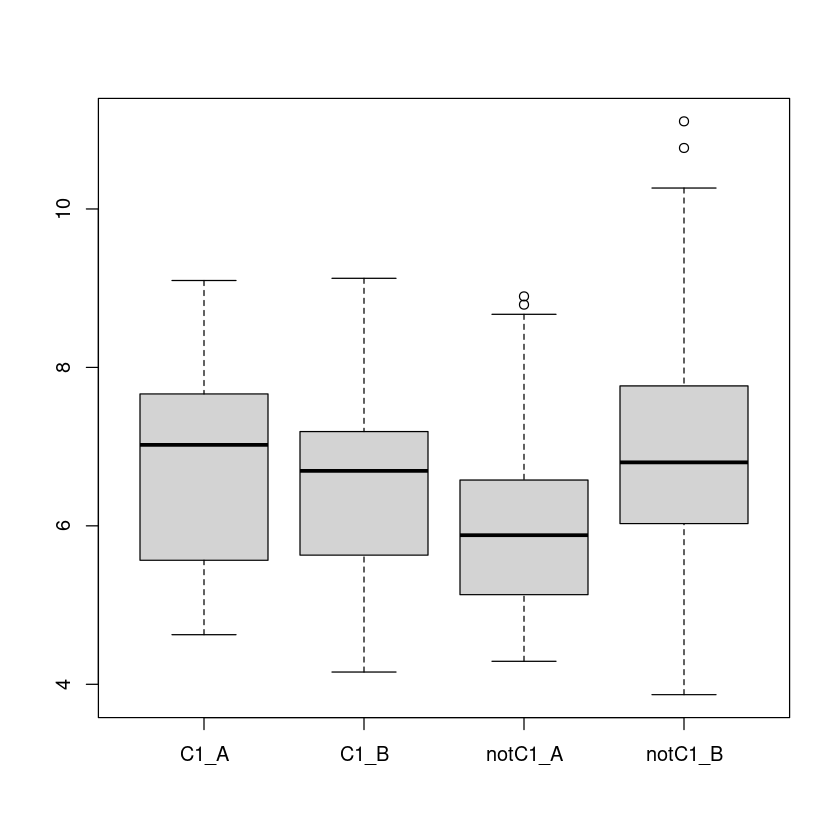

In [63]:
geneA <- genelist[3]
geneB <- genelist[4]

v1 <- dfa[dfa$cluster.group == 'cluster1', geneA]
v2 <- dfa[dfa$cluster.group == 'cluster1', geneB]
v3 <- dfa[dfa$cluster.group != 'cluster1', geneA]
v4 <- dfa[dfa$cluster.group != 'cluster1', geneB]

boxplot(list(C1_A=v1,C1_B=v2, notC1_A=v3, notC1_B=v4))

In [64]:
save(genelist, file='data/Females_feature_sel_genelist.rda')